<class 'pandas.core.frame.DataFrame'>
Index: 2242 entries, 2 to 2484
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           2242 non-null   object 
 1   year             2242 non-null   int64  
 2   value            2242 non-null   float64
 3   diagnosis        2242 non-null   object 
 4   region_standard  2242 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 105.1+ KB
None

Пропуски по колонкам:
 region             0
year               0
value              0
diagnosis          0
region_standard    0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 14
Уникальных диагнозов: ['alcohol' 'drugs']

Количество дубликатов: 0

Статистика value:
 count    2242.000000
mean       65.826093
std        75.524067
min         0.000000
25%        10.700000
50%        34.800000
75%       104.975000
max       847.500000
Name: value, dtype: float64


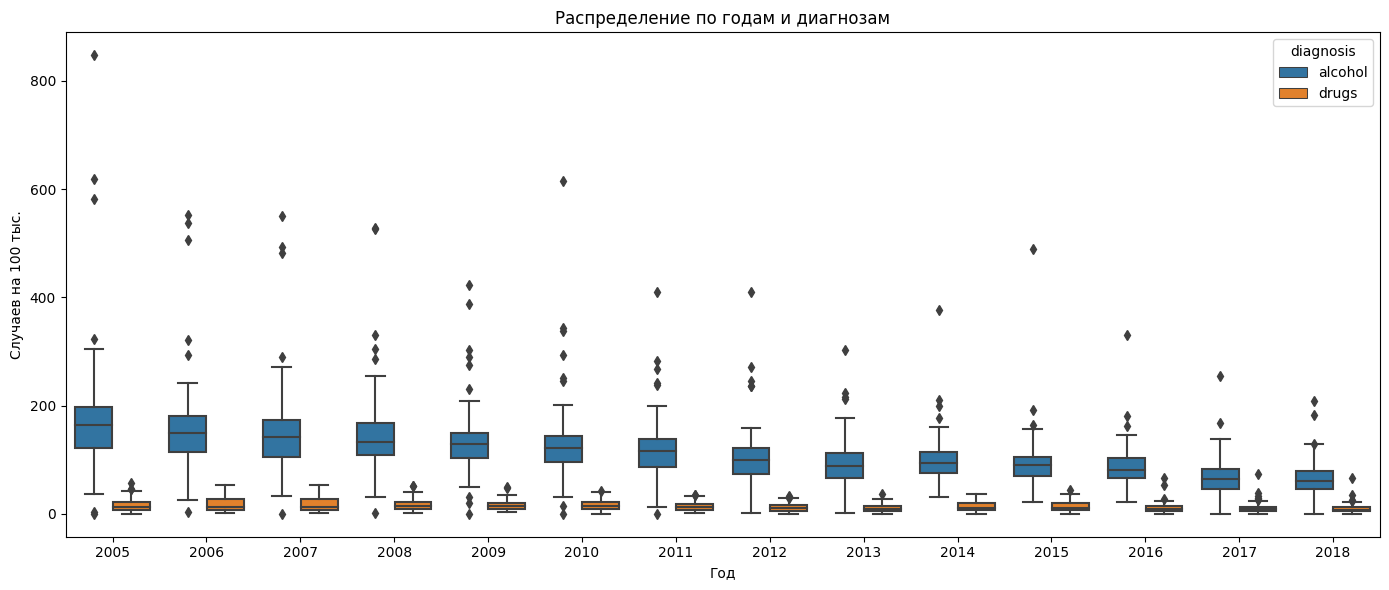

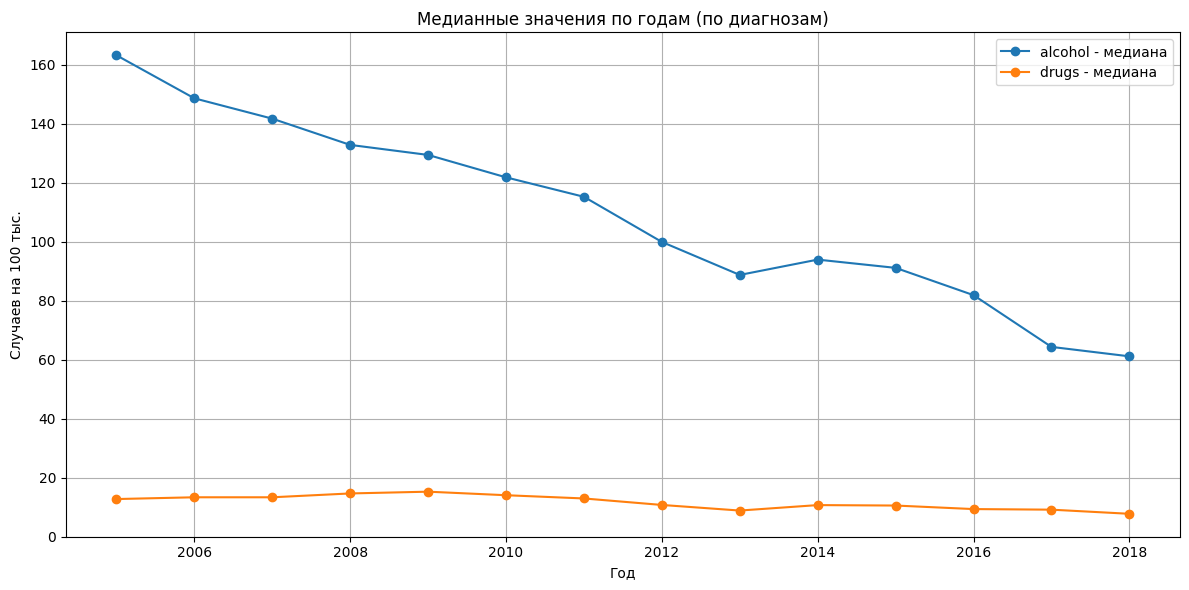

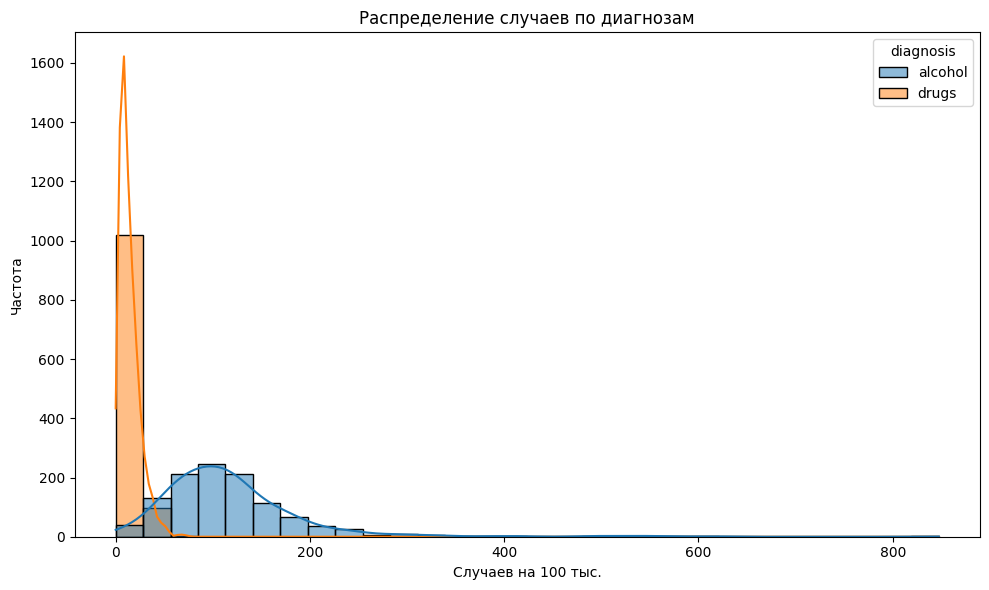

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/drug_alco_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Приводим value в float
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# 4. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 5. Уникальные регионы, годы, диагнозы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())
print("Уникальных диагнозов:", df["diagnosis"].unique())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Статистика по value
print("\nСтатистика value:\n", df["value"].describe())

# 8. Медианы по годам и диагнозам
median_all = df.groupby(["year", "diagnosis"])["value"].median().unstack()

# 9. Boxplot по годам и диагнозам
plt.figure(figsize=(14,6))
sns.boxplot(x="year", y="value", hue="diagnosis", data=df)
plt.title("Распределение по годам и диагнозам")
plt.xlabel("Год")
plt.ylabel("Случаев на 100 тыс.")
plt.tight_layout()
plt.show()

# 10. График медианных значений по диагнозам
plt.figure(figsize=(12,6))
for diag in median_all.columns:
    med = median_all[diag].dropna()
    plt.plot(med.index, med.values, marker="o", label=f"{diag} - медиана")
plt.title("Медианные значения по годам (по диагнозам)")
plt.xlabel("Год")
plt.ylabel("Случаев на 100 тыс.")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Гистограмма по значениям
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="value", hue="diagnosis", bins=30, kde=True)
plt.title("Распределение случаев по диагнозам")
plt.xlabel("Случаев на 100 тыс.")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `drug_alco_standardized.csv`

**Описание данных**
- 696 записей по 85 регионам.
- Период: 2005–2020.
- Показатели: случаи алкоголизма и наркомании на 100 тыс. населения.

---

**Типы данных**
- Все признаки корректны.
- `value` приведён к float.

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее: ~58 случаев.
- Медиана: ~33.
- Мин: 0.
- Макс: ~780.
- Сильное смещение вправо.

---

**Визуализации**
- **Boxplot по годам и диагнозам** — иллюстрирует разброс и медианы.
- **График медианных значений по годам** — показывает динамику.
- **Гистограмма распределения** — помогает увидеть преобладающие диапазоны.

---

**Вывод**
- Данные чистые, готовы к анализу.
- При интерпретации стоит учитывать высокую неравномерность (немного регионов с экстремально высокими значениями).


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/drug_alco_AfterEDA.csv", index=False)